### Data import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygmt
import pandas as pd
import xarray as xr
import pyproj
# The Fatiando stack
import boule as bl
import harmonica as hm
import verde as vd

c:\Users\chuck\anaconda3\envs\cratering-gravity\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


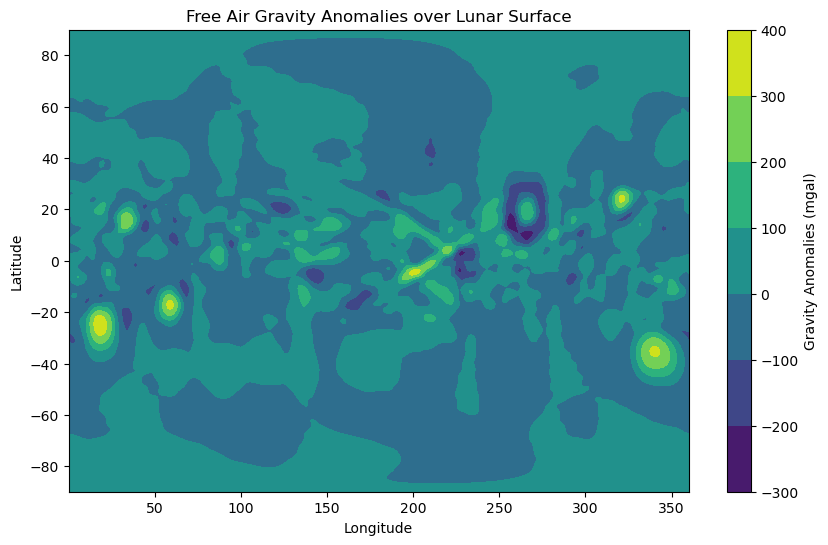

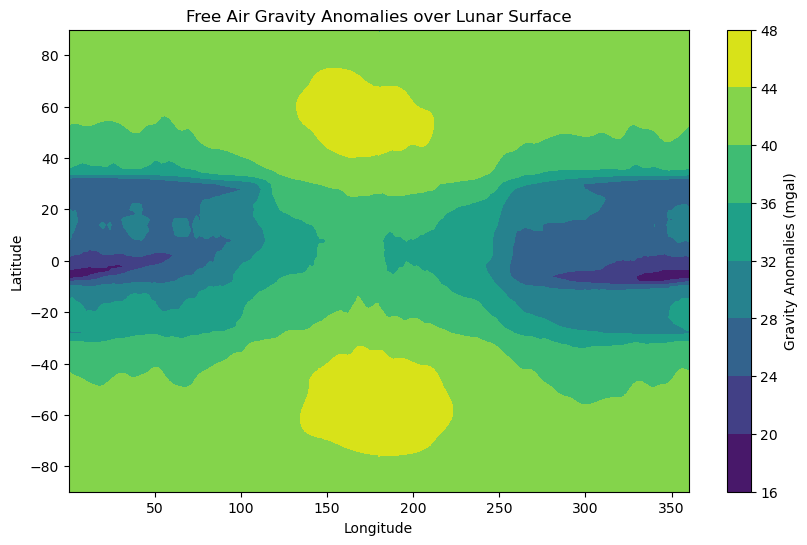

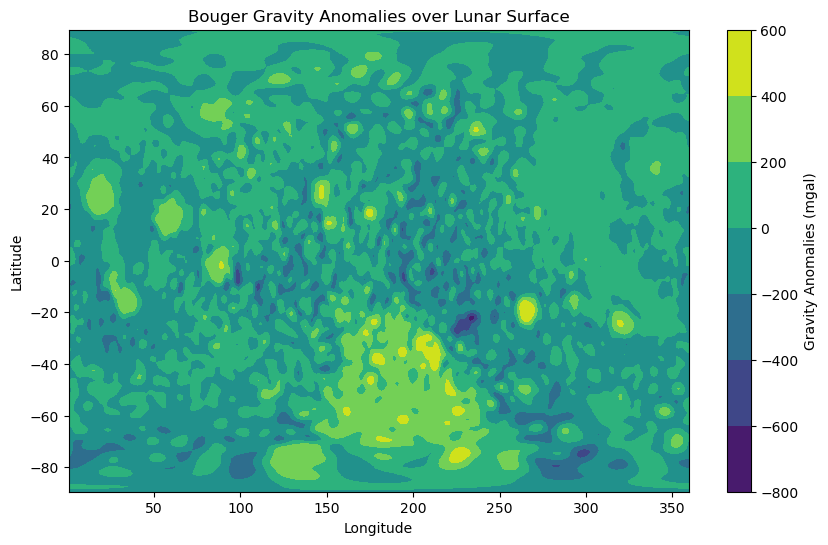

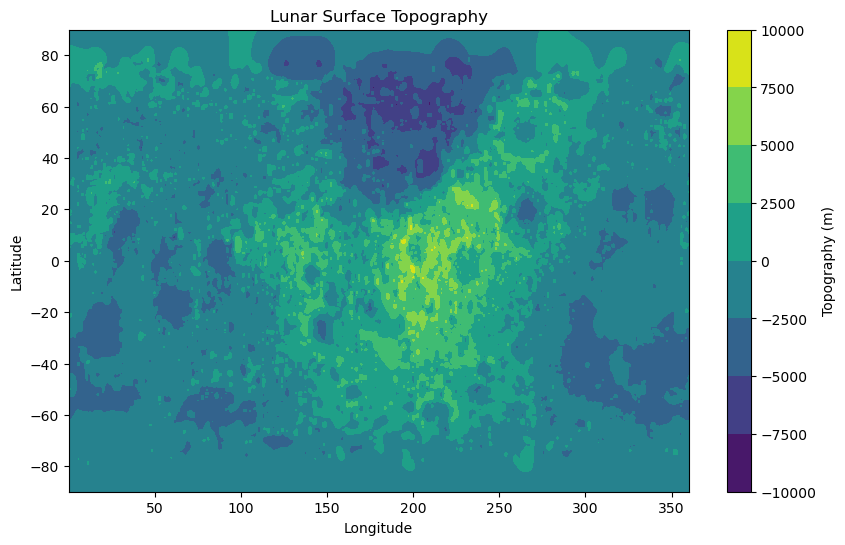

In [2]:
data1 = np.loadtxt('../Space_Files/fairgrd2.dat') #Free air anomaly data
data2 = np.loadtxt('../Space_Files/topogrd2.dat') #Topography data
data3 = np.loadtxt('../Space_Files/bouggrd.dat') #Bouger Gravity Anomalies
data4 = np.loadtxt('../Space_Files/fairerr2.dat') #Free air anomaly errors


# Step 2: Reshape it to a 1440 x 720 grid
grav_grid = np.reshape(data1, (720, 1440))

grav_err_grid = np.reshape(data4, (720, 1440))

#grav_perc_err_grid = grav_err_grid/grav_grid

grav2_grid = np.reshape(data3, (180, 360))

topo_grid = np.reshape(data2, (720, 1440))

# Step 3: Create latitude and longitude arrays
lon = np.linspace(0.125, 359.875, 1440)
lat = np.linspace(89.875, -89.875, 720)

lon2 = np.linspace(0.5, 359.5, 360)
lat2 = np.linspace(-89.5, 89.5, 180)

# Create a meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(lon, lat)
lon2_grid, lat2_grid = np.meshgrid(lon2, lat2)
# Plot the free air gravity anomalies as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, grav_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Gravity Anomalies (mgal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Free Air Gravity Anomalies over Lunar Surface')
plt.show()
# Plot the free air gravity errors as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, grav_err_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Gravity Anomalies (mgal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Free Air Gravity Anomalies over Lunar Surface')
plt.show()

# Plot the Bouger gravity anomalies as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon2_grid, lat2_grid, grav2_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Gravity Anomalies (mgal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bouger Gravity Anomalies over Lunar Surface')
plt.show()

# Plot the topography as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, topo_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Topography (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lunar Surface Topography')
plt.show()

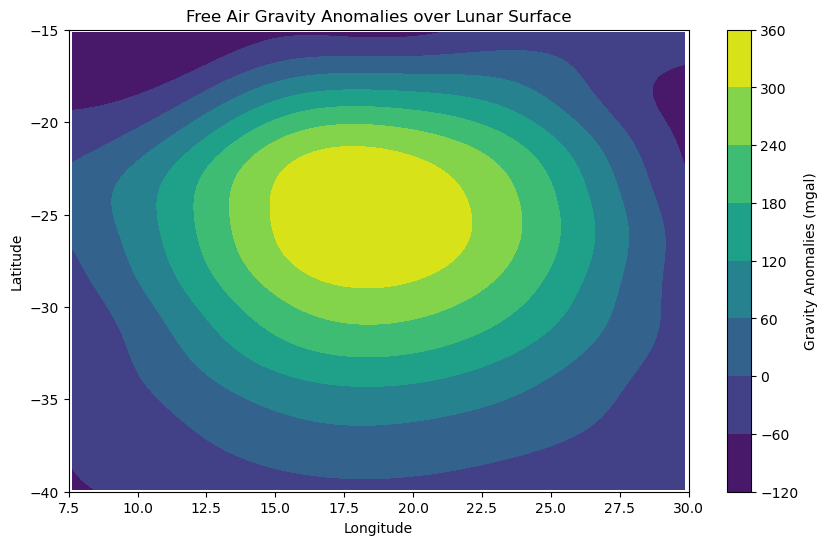

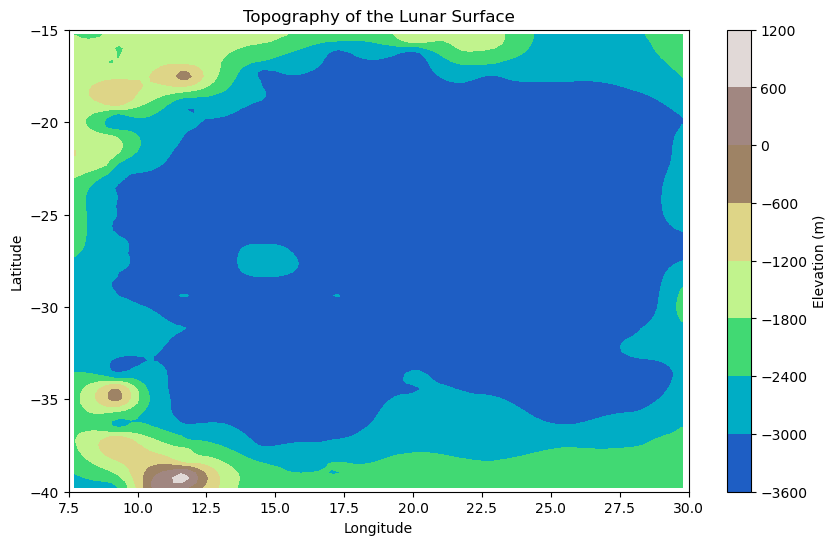

In [3]:
# Flatten the grids and arrays
grav_flat = grav_grid.flatten()
grav_err_flat = grav_err_grid.flatten()
topo_flat = topo_grid.flatten()
lat_flat = lat_grid.flatten()
lon_flat = lon_grid.flatten()

# Create dataframes
grav_data = pd.DataFrame({
    "Free Air Anomalies": grav_flat,
    "Free Air Anomaly Errors": grav_err_flat,
    "latitude": lat_flat,
    "longitude": lon_flat
})

topo_data = pd.DataFrame({
    "latitude": lat_flat,
    "longitude": lon_flat,
    "elevation": topo_flat
})

from Scripts.crop_datasets import crop_dataset
from Scripts.plot_grav_topo import plot_gravity_anomalies, plot_topography

crop_grav, crop_topo = crop_dataset(grav_data, topo_data, min_lat = -40, max_lat = -15, min_lon = 7.5, max_lon = 30)

plot_gravity_anomalies(crop_grav,min_lat = -40, max_lat = -15, min_lon = 7.5, max_lon = 30)

plot_topography(crop_topo, min_lat = -40, max_lat = -15, min_lon = 7.5, max_lon = 30)

In [21]:
# # Convert pandas DataFrame to xarray DataArray
topo_data_array = xr.DataArray(crop_topo)

# # Save the DataArray to a netCDF file
topo_data_array.to_netcdf('topography.nc', mode='w')



PermissionError: [Errno 13] Permission denied: 'c:\\Users\\chuck\\cratering-gravity\\cratering-gravity\\Notebooks\\topography.nc'

In [19]:

# # Load the netCDF file
topography = xr.open_dataarray('topography.nc')


# topo_data = pygmt.datasets.load_earth_relief(resolution="30s", region=[0, 360, -90, 90])

# # Create the plot
# fig = pygmt.Figure()
# fig.grdimage(grid=topo_data, cmap="gray", projection="M15c", frame=True)
# fig.colorbar(frame='af+l"Topography (m)"')
# fig.show()
topography

<xarray.DataArray (dim_0: 9000, dim_1: 3)>
[27000 values with dtype=float64]
Coordinates:
  * dim_0    (dim_0) int64 604830 604831 604832 604833 ... 747477 747478 747479
  * dim_1    (dim_1) object 'latitude' 'longitude' 'elevation'

In [6]:
projection = pyproj.Proj(proj="merc", lat_ts=crop_grav.latitude.mean())

easting, northing = projection(crop_grav.longitude.values, crop_grav.latitude.values)
crop_grav["easting"] = easting
crop_grav["northing"] = northing
crop_grav

C:\Users\chuck\AppData\Local\Temp\ipykernel_27908\1571964068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_grav["easting"] = easting
C:\Users\chuck\AppData\Local\Temp\ipykernel_27908\1571964068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_grav["northing"] = northing


,Free Air Anomalies,Free Air Anomaly Errors,latitude,longitude,easting,northing
604830,-61.70,31.64,-15.125,7.625,7.534426e+05,-1.502310e+06
604831,-66.49,31.61,-15.125,7.875,7.781456e+05,-1.502310e+06
604832,-71.27,31.58,-15.125,8.125,8.028486e+05,-1.502310e+06
604833,-75.98,31.51,-15.125,8.375,8.275517e+05,-1.502310e+06
604834,-80.59,31.44,-15.125,8.625,8.522547e+05,-1.502310e+06
...,...,...,...,...,...,...
747475,-28.23,39.04,-39.875,28.875,2.853200e+06,-4.278797e+06
747476,-28.33,39.06,-39.875,29.125,2.877904e+06,-4.278797e+06
747477,-28.37,39.07,-39.875,29.375,2.902607e+06,-4.278797e+06
747478,-28.37,39.08,-39.875,29.625,2.927310e+06,-4.278797e+06


In [7]:
from scipy.interpolate import griddata
min_lat = -40
max_lat = -15
min_lon = 7.5 
max_lon = 30
# Define latitude and longitude coordinates based on the metadata
num_lat_points = 100
num_lon_points = 100
lat_coords = np.linspace(min_lat, max_lat, num_lat_points)
lon_coords = np.linspace(min_lon, max_lon, num_lon_points)

# Assuming topo_data is a DataFrame containing latitude, longitude, and elevation data
# Convert the DataFrame to a NumPy array
elevation_data = crop_topo['elevation'].values

# Find the indices of non-NaN values
not_nan_indices = ~np.isnan(elevation_data)

# Interpolate NaN values using griddata
interpolated_elevation = griddata(
    (crop_topo['longitude'][not_nan_indices], crop_topo['latitude'][not_nan_indices]),  # Corrected the order
    elevation_data[not_nan_indices],
    (lon_coords[None, :], lat_coords[:, None]),  # Corrected the order
    method='linear'
)

# Create the xarray DataArray for the interpolated elevation data
topo_data_array = xr.DataArray(interpolated_elevation, coords={'latitude': lat_coords, 'longitude': lon_coords}, dims=('latitude', 'longitude'))


In [18]:
topo_plain = vd.project_grid(topography, projection=projection)
topo_plain

# region = (min_lon, max_lon, min_lat, max_lat)
# region_padded = vd.pad_region(region, pad=5)  # pad the original region
# topography = crop_topo.sel(
#     longitude=slice(*region_padded[:2]),
#     latitude=slice(*region_padded[2:]),
# )

# # Project the grid
# projection = pyproj.Proj(proj="merc", lat_ts=topography.latitude.values.mean())
# topo_plain = vd.project_grid(topography.topography, projection=projection)

ValueError: could not convert string to float: 'latitude'

In [17]:
topo_prisms = hm.prism_layer(
    coordinates=(topo_plain.easting, topo_plain.northing),
    surface=topo_plain.values,
    reference=0,
    properties={"density": 2400 * np.ones_like(topo_plain)}
)

len(topo_prisms.easting)

100

In [10]:
coordinates = (crop_grav.easting, crop_grav.northing, crop_topo.elevation)
terrain_effect = topo_prisms.prism_layer.gravity(coordinates, field="g_z")

terr_easting = np.linspace(7.635e5, 2.942e6, 100)
terr_northing = np.linspace(-4.262e6, -1.515e6, 100)

coordinates
np.shape(crop_grav.easting)

(9000,)

In [14]:
crop_grav["gravsim"] =  terrain_effect
crop_grav

C:\Users\chuck\AppData\Local\Temp\ipykernel_27908\2584137398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_grav["gravsim"] =  terrain_effect


,Free Air Anomalies,Free Air Anomaly Errors,latitude,longitude,easting,northing,gravsim
604830,-61.70,31.64,-15.125,7.625,7.534426e+05,-1.502310e+06,-0.944443
604831,-66.49,31.61,-15.125,7.875,7.781456e+05,-1.502310e+06,-1.448496
604832,-71.27,31.58,-15.125,8.125,8.028486e+05,-1.502310e+06,-1.789016
604833,-75.98,31.51,-15.125,8.375,8.275517e+05,-1.502310e+06,-1.975845
604834,-80.59,31.44,-15.125,8.625,8.522547e+05,-1.502310e+06,-1.964701
...,...,...,...,...,...,...,...
747475,-28.23,39.04,-39.875,28.875,2.853200e+06,-4.278797e+06,-25.734639
747476,-28.33,39.06,-39.875,29.125,2.877904e+06,-4.278797e+06,-26.493612
747477,-28.37,39.07,-39.875,29.375,2.902607e+06,-4.278797e+06,-27.301615
747478,-28.37,39.08,-39.875,29.625,2.927310e+06,-4.278797e+06,-27.768641


C:\Users\chuck\AppData\Local\Temp\ipykernel_27908\3112046756.py:4: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


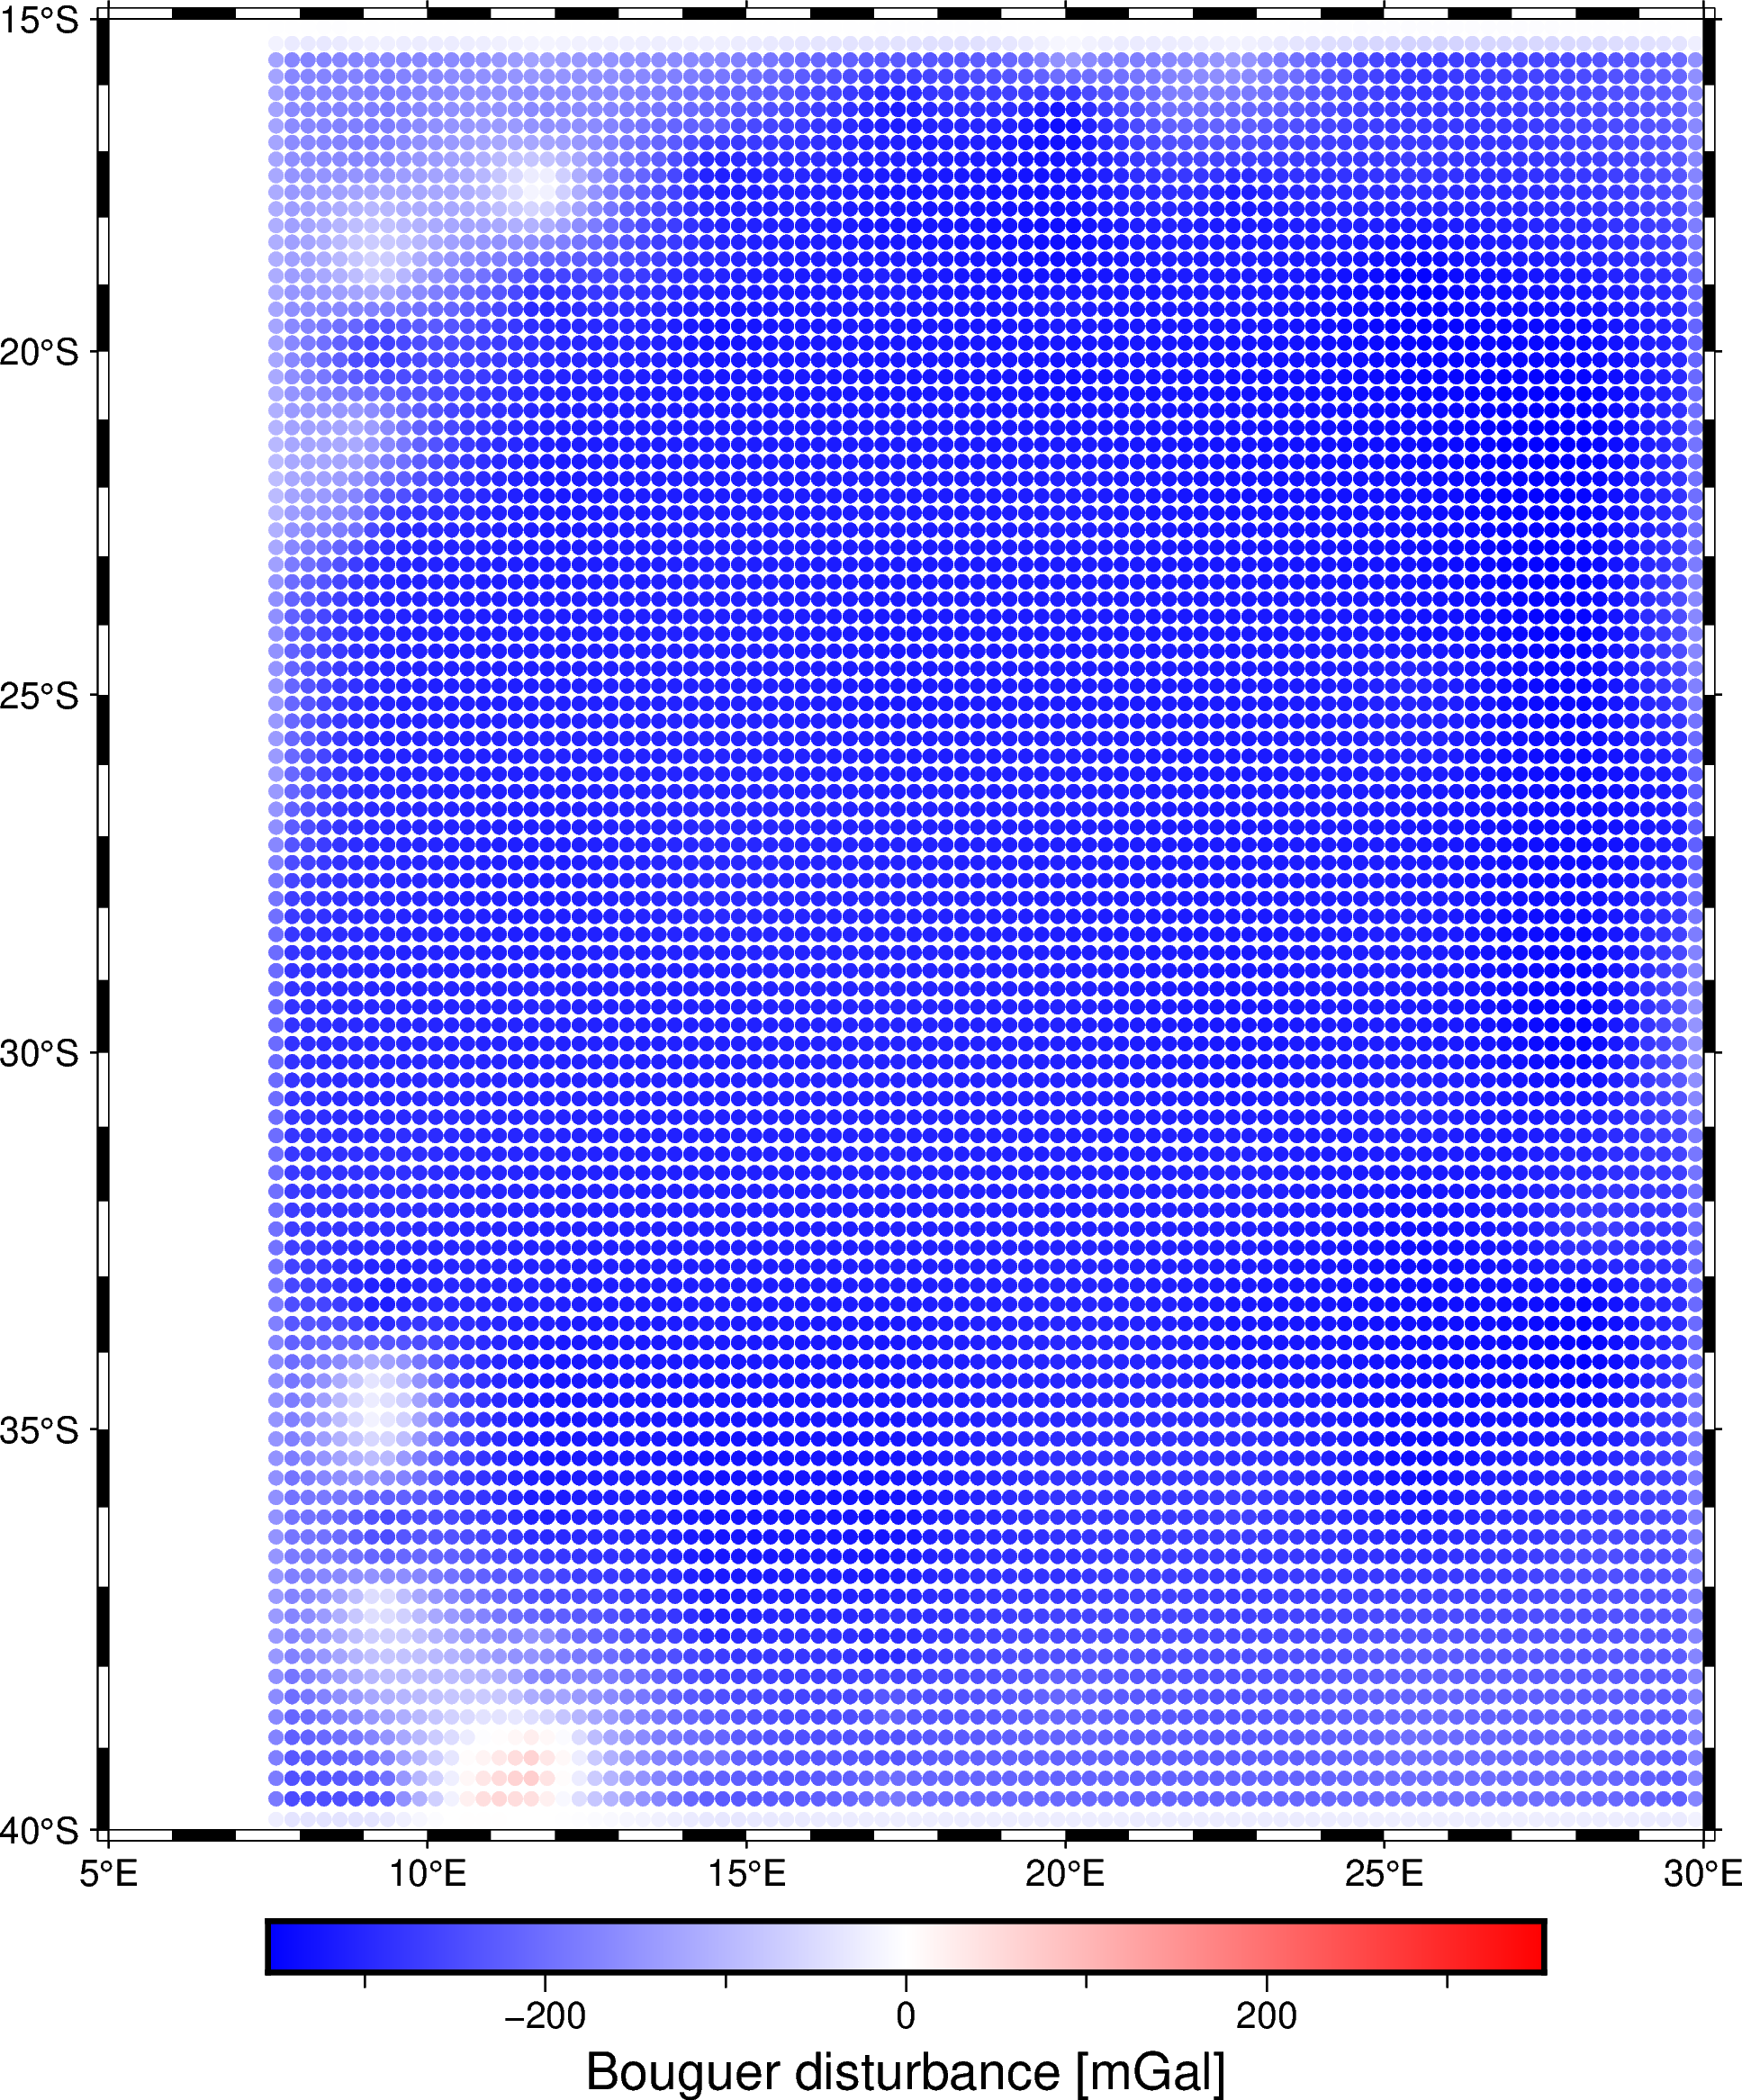

In [15]:
fig = pygmt.Figure()
maxabs = vd.maxabs(crop_grav.gravsim)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=crop_grav.longitude,
    y=crop_grav.latitude,
    color=crop_grav.gravsim,
    cmap=True,
    style="c4p",
    projection="M15c", 
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

In [13]:
# merge into a dataset
# region = (min_lon, max_lon, min_lat, max_lat)
# coordinates = vd.grid_coordinates(region=region, spacing=0.2, extra_coords=4000)
# easting, northing = projection(*coordinates[:2])
# coordinates_projected = (easting, northing, coordinates[-1])

easting_flat = coordinates[0].values.flatten()
northing_flat = coordinates[1].values.flatten()

# Reshape terrain_effect to match the dimensions of easting_flat and northing_flat
terrain_effect_reshaped = terrain_effect.reshape(len(easting_flat), len(northing_flat))

# Create the grid with flattened coordinates
grid = vd.make_xarray_grid(
    (easting_flat, northing_flat),
    terrain_effect,
    data_names="gravity",
    extra_coords_names="extra",
)

# Set figure properties
xy_region = vd.get_region((terr_easting, terr_northing))
w, e, s, n = xy_region
fig_height = 10
fig_width = fig_height * (e - w) / (n - s)
fig_ratio = (n - s) / (fig_height / 100)
fig_proj = f"x1:{fig_ratio}"

# Make a plot of the computed gravity
fig = pygmt.Figure()

title = "Gravitational acceleration of the topography"

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        region=xy_region,
        projection=fig_proj,
        grid=grid.gravity,
        frame=["ag", f"+t{title}"],
        cmap="vik",
    )

fig.colorbar(cmap=True, frame=["a100f50", "x+lmGal"])

fig.show()

print(len(coordinates))
print(len(terrain_effect))


ValueError: cannot reshape array of size 9000 into shape (9000,9000)

In [ ]:
print(len(coordinates), len(coordinates[0]), len(coordinates[1]), len(coordinates[2]))

print(terrain_effect.shape)

3 9000 9000 9000
(9000,)
